## 🍃 Análise da base de dados que contém informações sobre solo e temperatura relacionados a tipos de plantações

O presente documento jupyter notebook tem como objetivos realizar análises exploratórias e descritivas assim como desenvolver modelos preditivos buscando a melhorar performance.

A obtenção dos dados já foi realizada e disponibilizada, e se encontra no arquivo estruturado chamado: Atividade_Cap_14_produtos_agricolas.csv.

### 🍀 Características dos dados:

1. Fonte: **dados terciários**, pois são dados disponibilizados publicamente.
2. Granularidade: **dados desagregados**, pois são dados brutos e individuais.
3. Estrutura: **dados estruturados**, pois são dados organizados em coluna (variáveis) e linhas (valores).
4. Tipo: **doados numéricos e categóricos**
   1. Valores discretos nas colunas: N, P e K
   2. Valores contínuos nas colunas: temperature, humidity, ph e rainfall
   3. Valores nominais na coluna label

### 🌸 Definição dos dados:

O arquivo Atividade_Cap_14_produtos_agricolas.csv possui 8 colunas, das quais:

* N: quantidade de nitrogênio no solo
* P: quantidade de fósforo no solo
* K: quantidade de potássio no solo
* temperature: temperatura média da região em graus Celsius
* humidity: umidade média do ar na região
* ph: pH do solo
* rainfall: precipitação em milímetros
* label: tipo de cultura plantada nas condições daquela linha

### 💥 Pipeline para realização da modelagem:

Como os dados já foram obtidos, seguiremos para:

1. Limpeza dos dados
2. Exploração dos dados
3. Engenharia de features
4. Modelagem preditiva
5. Visualização dos dados

## 🔥 Pré-processamento dos dados:

Os códigos abaixo estarão relacionados a limpeza e exploração da base:

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
#from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier


In [2]:
# Leitura do arquivo para mostrar informações do tipo de cada variável, quantidade de linhas e colunas
path = r"Atividade_Cap_14_produtos_agricolas.csv"
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [3]:
# As 5 primeiras linhas do arquivo
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
#Pegando informações estatísticas sobre a base
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
# Mostrar a quantidade de valores únicos em cada coluna
df.nunique()

# Existem 22 tipos de plantações diferentes na base

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [6]:
# Mostrar a quantidade de valores nulos em casa coluna
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

<Axes: >

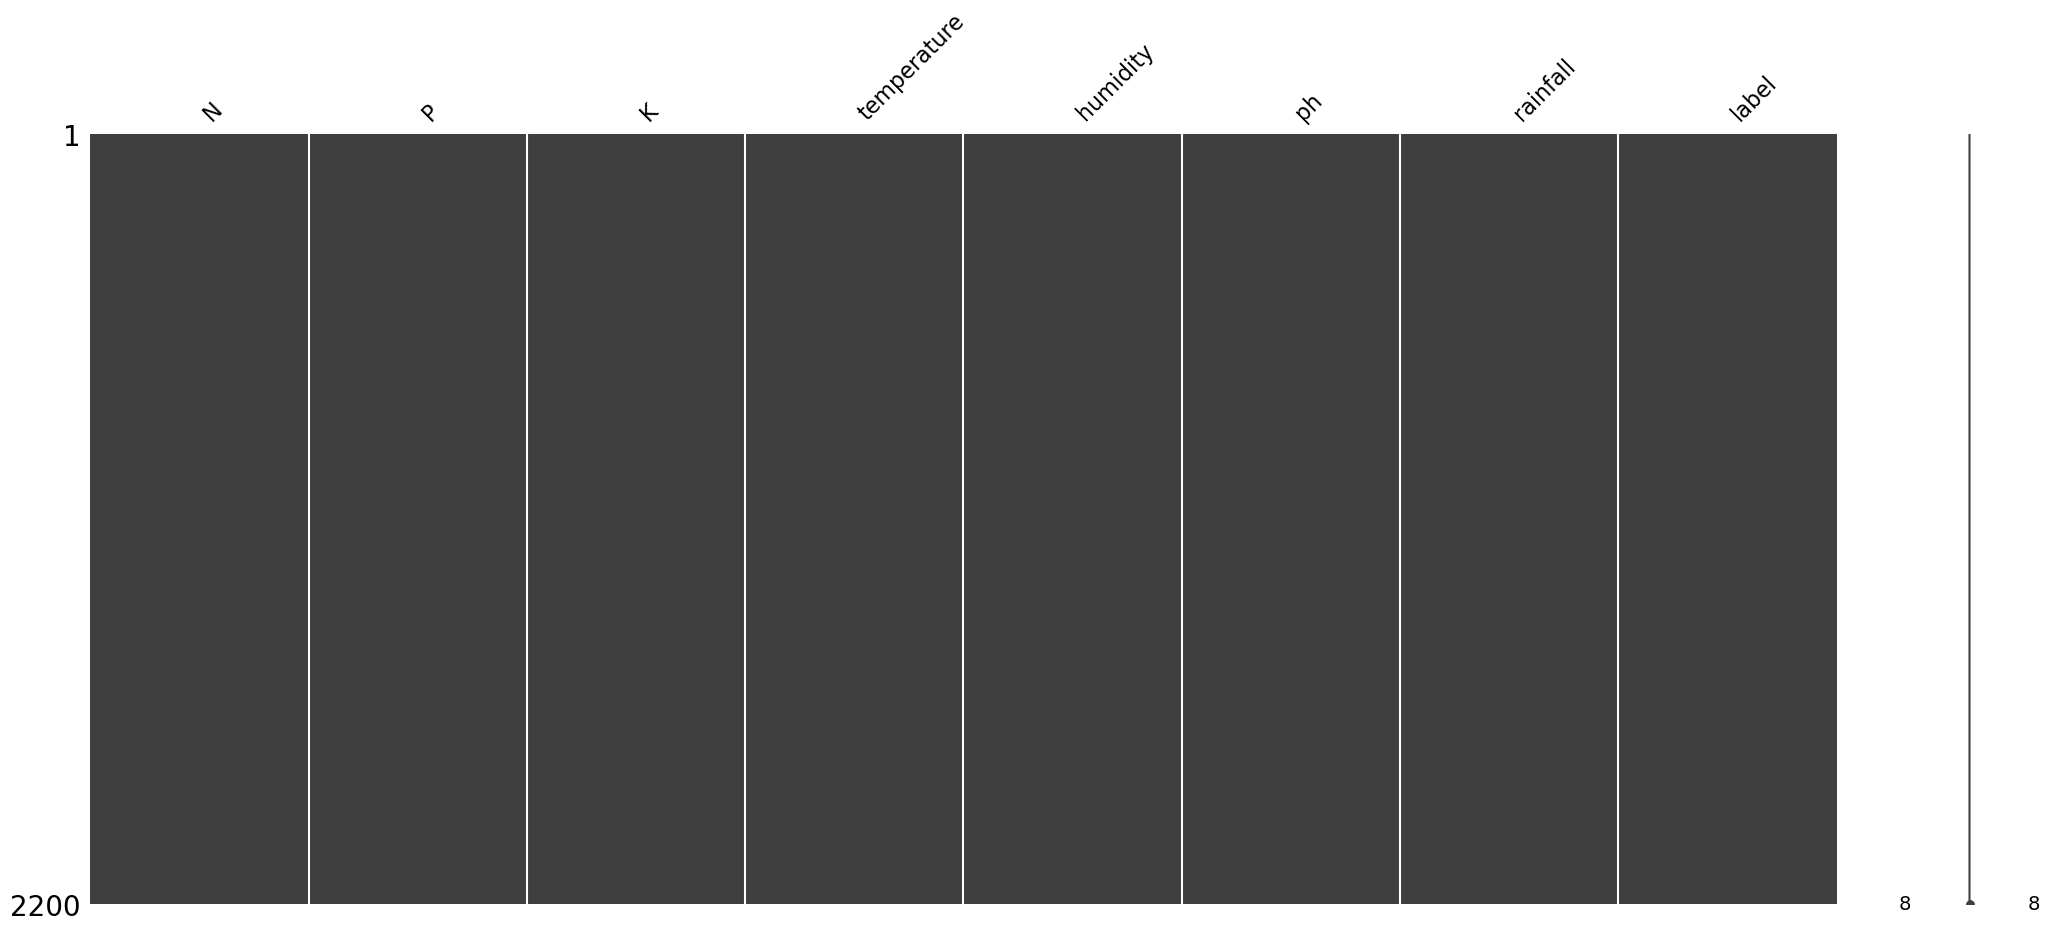

In [7]:
import missingno as mscno

#Visualizar dados faltantes
mscno.matrix(df)

**Análise do gráfico acima**: não há dados faltantes.

In [8]:
# Verificar a presença de dados duplicados
duplicates = df.duplicated().sum()
print("Número de dados duplicados:", duplicates)

Número de dados duplicados: 0


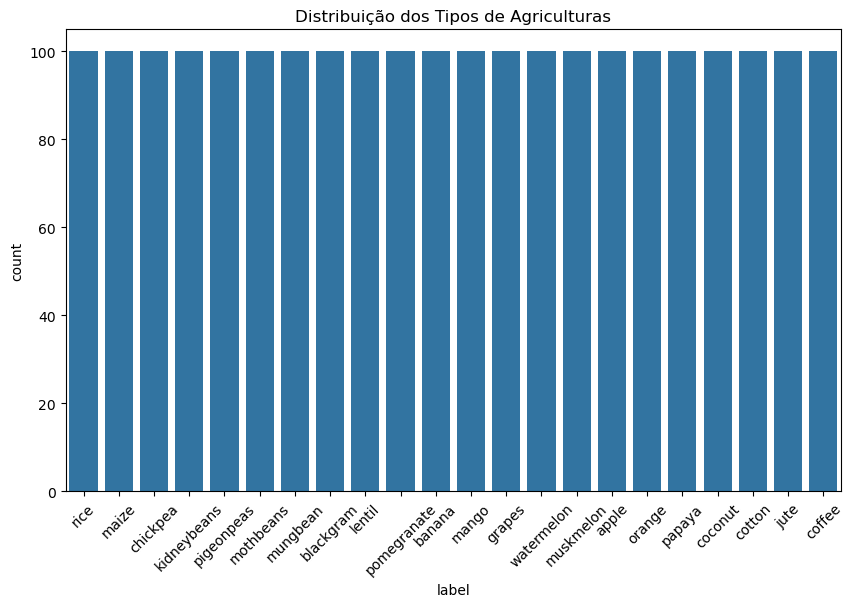

In [9]:
# Exploração da distribuição dos labels
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df)
plt.title("Distribuição dos Tipos de Agriculturas")
plt.xticks(rotation=45)
plt.show()

**Análise do gráfico acima**: Existem 22 tipos diferentes de agriculturas, distribuidas uniformemente em 100 recorrências. Esse é um problema de classificação multiclasse.

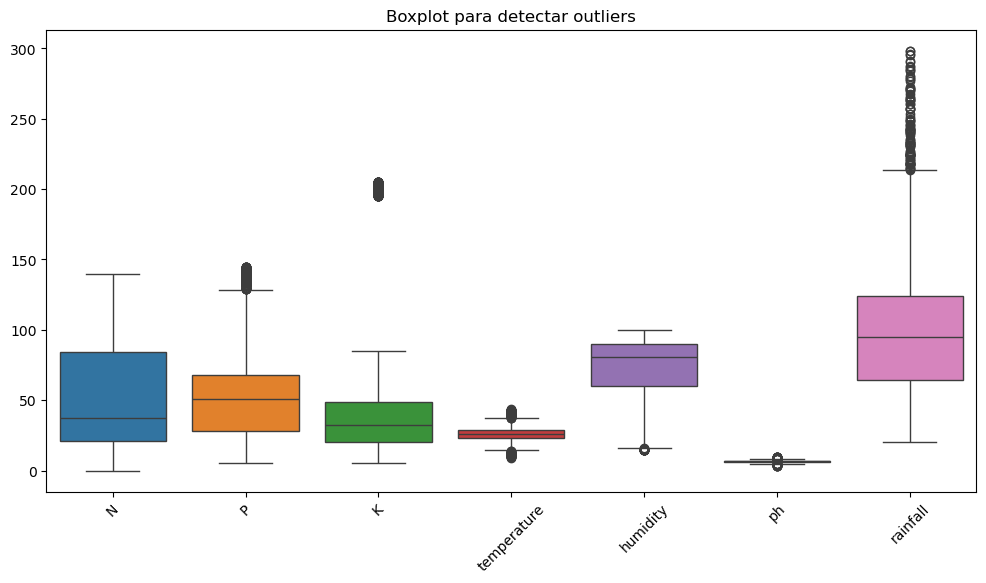

In [10]:
# Verificar a presença de outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot para detectar outliers")
plt.xticks(rotation=45)
plt.show()

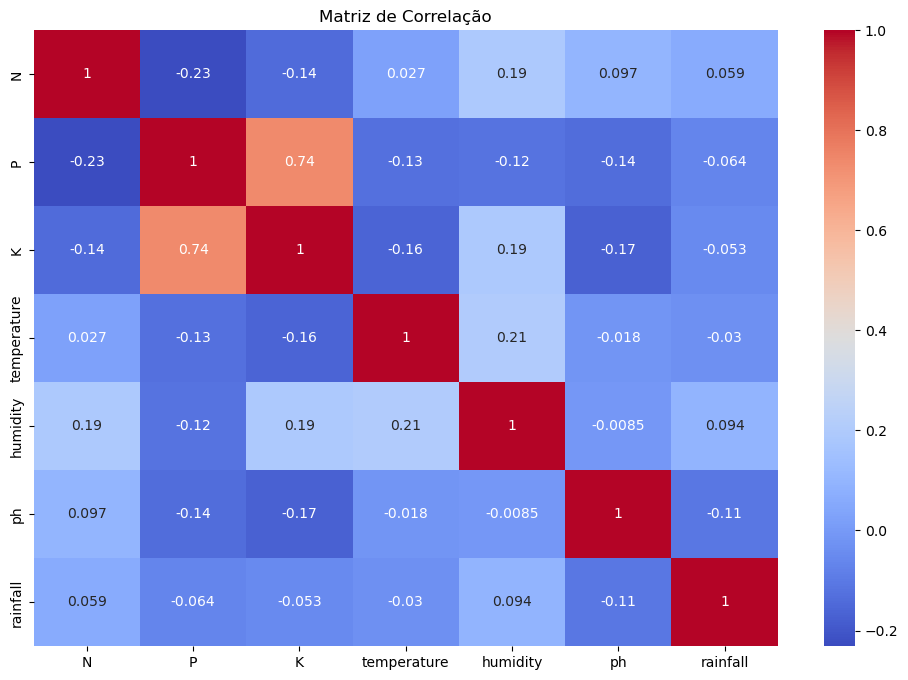

In [11]:
# Correlação entre as features numéricas
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=numerics).corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

**Análise do gráfico de outliers**: somente o Nitrogênio (coluna N) não tem dados outliers.

**Matrix do correlação**: para avaliar a correlação entre as variáveis numéricas.

Nota-se uma alta correlação entre as variáveis: "P (fósforo) e K (potássio)" e "K (potássio) e ph".

In [12]:
# Tratar outliers, se necessário (substituir por média, mediana, etc.)

# Substituindo outliers do Fósforo pela média
df['P'] = df['P'].apply(lambda x: df['P'].mean() if x > df['P'].quantile(0.975) or x < df['P'].quantile(0.025) else x)
# Substituindo outliers do potássio pela média
df['K'] = df['K'].apply(lambda x: df['K'].mean() if x > df['K'].quantile(0.975) or x < df['K'].quantile(0.025) else x)
# Substituindo outliers da temperatura pela média
df['temperature'] = df['temperature'].apply(lambda x: df['temperature'].mean() if x > df['temperature'].quantile(0.975) or x < df['temperature'].quantile(0.025) else x)
# Substituindo outliers da umidade pela média
df['humidity'] = df['humidity'].apply(lambda x: df['humidity'].mean() if x > df['humidity'].quantile(0.975) or x < df['humidity'].quantile(0.025) else x)
# Substituindo outliers do ph pela média
df['ph'] = df['ph'].apply(lambda x: df['ph'].mean() if x > df['ph'].quantile(0.975) or x < df['ph'].quantile(0.025) else x)
# Substituindo outliers da precipitação pela média
df['rainfall'] = df['rainfall'].apply(lambda x: df['rainfall'].mean() if x > df['rainfall'].quantile(0.975) or x < df['rainfall'].quantile(0.025) else x)

df.shape

(2200, 8)

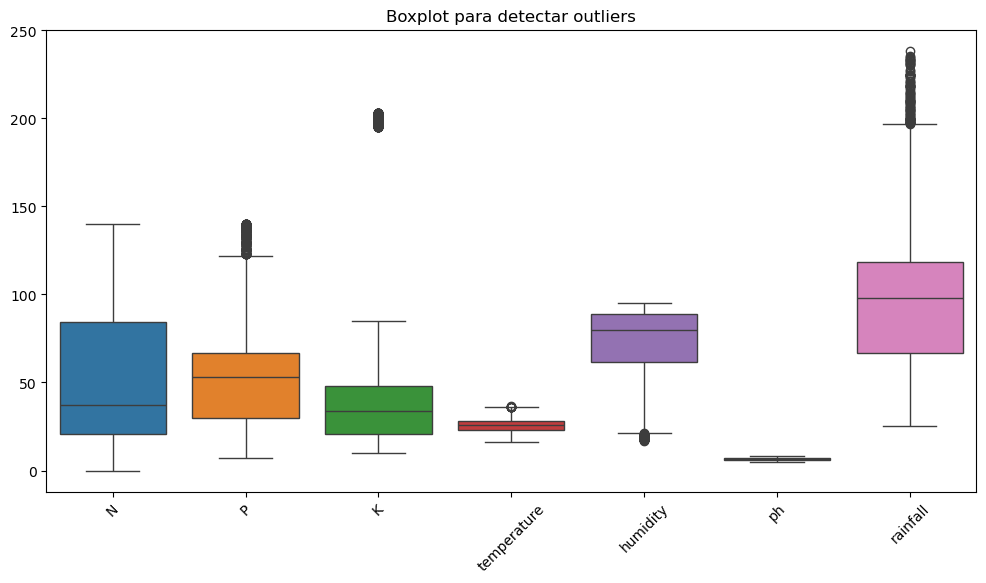

In [13]:
#Gráfico para mostrar os outliers após o tratamento
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot para detectar outliers")
plt.xticks(rotation=45)
plt.show()

### ⭐ Conclusão sobre a limpeza da base:

Não há valores nulos e nem duplicados, no entanto existiam ouliers nos dados numéricos que foram tratados.

### 🌻 Engenharia de features

Finalizada a exploração a limpeza da base, inicia-se a Engenhria de features, onde serão realizados:

1. Separação das features (X) das labels (Y).
2. Transformação da label, que é uma string, em número.
4. Separação dos dados em treino (80%) e teste (20%).
5. Normalização das features numéricas.
   

In [14]:
# Separando features e labels
X = df.drop('label', axis=1)
y = df['label']

# Label Encoder para a variável alvo
le = LabelEncoder()
y = le.fit_transform(y)
y

array([20, 20, 20, ...,  5,  5,  5], shape=(2200,))

In [15]:
#Dividindo os dados em conjunto de teste e treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização das features numéricas
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_teste_scaled = scaler.transform(X_test)

### 🎉 Modelos Preditivos

Como a base de dados possui uma label, ou seja, um rótulo, serão utilizados modelos supervisionados.
Com os dados normalizados e já separados para treinamento e teste, abaixo têm-se a aplicação dos modelos:

1. KNN, com o valor de k=9.


In [16]:
# KNN
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_teste_scaled)
print("Acurácia KNN:", accuracy_score(y_test, y_pred_knn))

Acurácia KNN: 0.9295454545454546


In [17]:
print(confusion_matrix(y_test, y_pred_knn))

[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  3  0  1 19  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

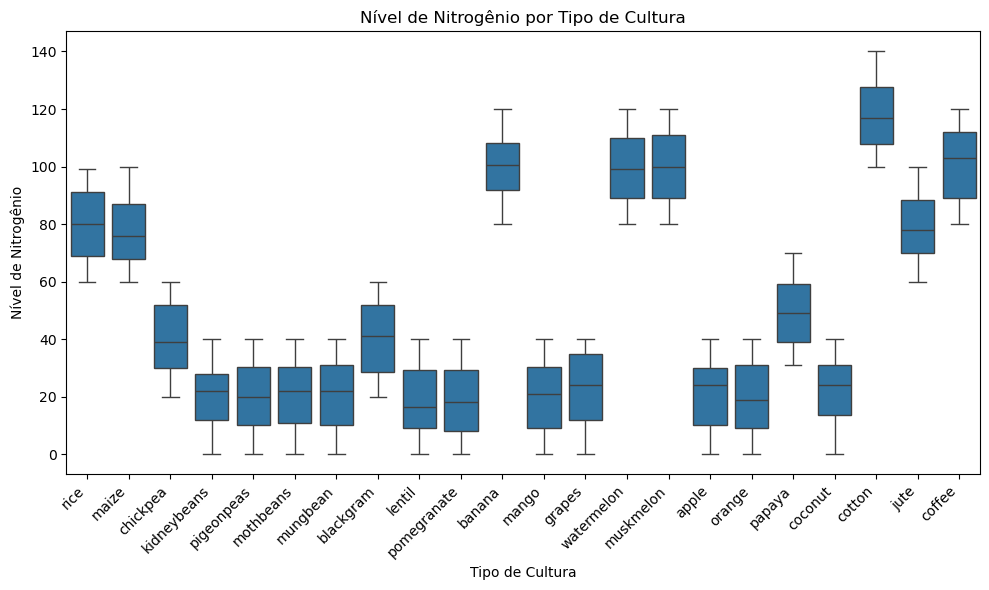

In [18]:
#Colocar explicação e motivação de todos os gráficos abaixo:

plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='N', data=df)
plt.title('Nível de Nitrogênio por Tipo de Cultura')
plt.xlabel('Tipo de Cultura')
plt.ylabel('Nível de Nitrogênio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

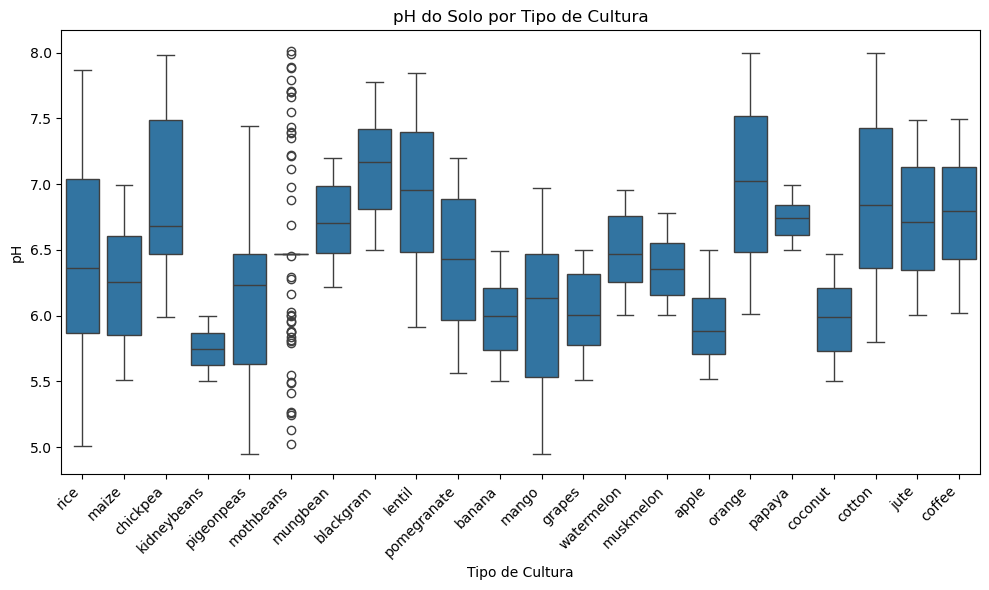

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='ph', data=df)
plt.title('pH do Solo por Tipo de Cultura')
plt.xlabel('Tipo de Cultura')
plt.ylabel('pH')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

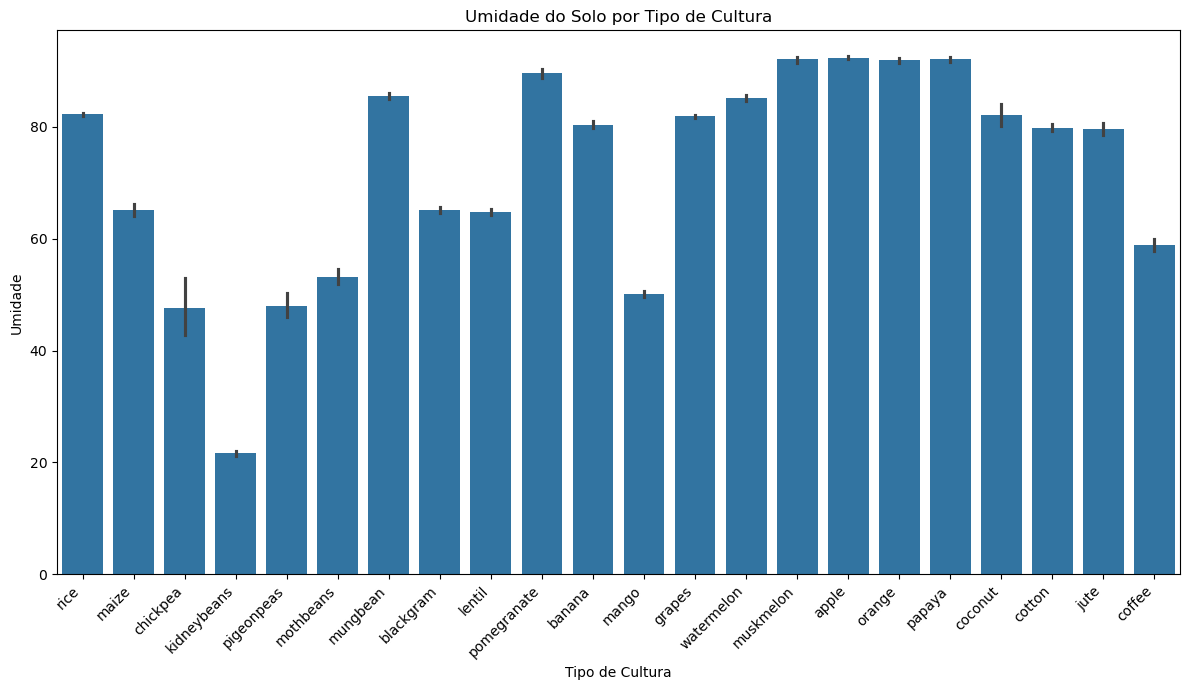

In [20]:
plt.figure(figsize=(12, 7))
sns.barplot(x='label', y='humidity', data=df)
plt.title('Umidade do Solo por Tipo de Cultura')
plt.xlabel('Tipo de Cultura')
plt.ylabel('Umidade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

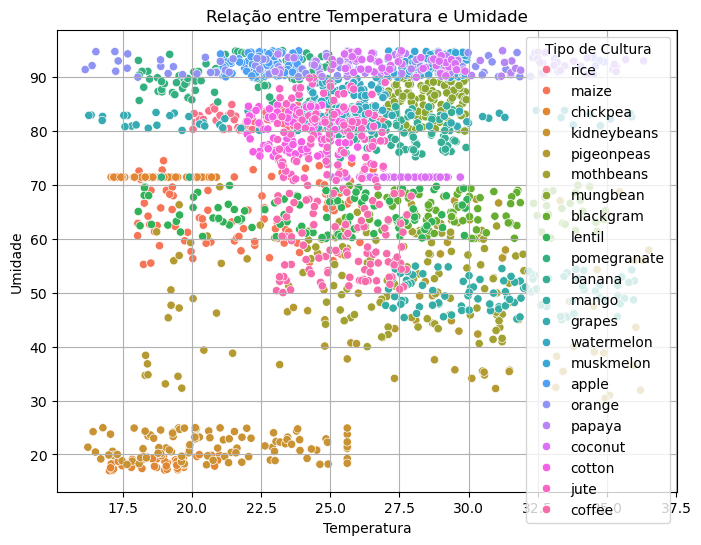

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temperature', y='humidity', hue='label', data=df)
plt.title('Relação entre Temperatura e Umidade')
plt.xlabel('Temperatura')
plt.ylabel('Umidade')
plt.grid(True)
plt.legend(title='Tipo de Cultura')
plt.show()

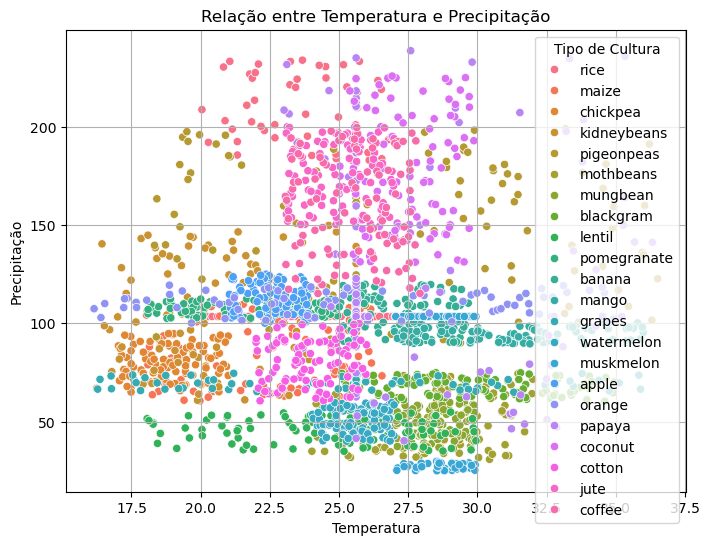

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temperature', y='rainfall', hue='label', data=df)
plt.title('Relação entre Temperatura e Precipitação')
plt.xlabel('Temperatura')
plt.ylabel('Precipitação')
plt.grid(True)
plt.legend(title='Tipo de Cultura')
plt.show()

In [23]:
grupo = [col for col in df.columns if col != 'label']

In [24]:
analise_grupo = df[grupo]

In [25]:
media = analise_grupo.mean()
print(media)

N               50.551818
P               52.567112
K               46.162646
temperature     25.576562
humidity        72.245615
ph               6.463696
rainfall       101.475592
dtype: float64


In [26]:
mediana = analise_grupo.median()
print(mediana)

N              37.000000
P              53.000000
K              34.000000
temperature    25.616244
humidity       79.638927
ph              6.461422
rainfall       98.005236
dtype: float64


In [27]:
desvio_padrao = analise_grupo.std()
print(desvio_padrao)

N              36.917334
P              29.634031
K              45.626995
temperature     4.000619
humidity       20.014043
ph              0.606323
rainfall       46.913273
dtype: float64


In [28]:
grupo_culturas = df.groupby('label')

In [29]:
medias_culturas = grupo_culturas.mean()
print(medias_culturas)

                  N           P           K  temperature   humidity        ph  \
label                                                                           
apple         20.80  109.051564  167.051309    22.630942  92.333383  5.929663   
banana       100.23   82.010000   50.050000    27.376798  80.358123  5.983893   
blackgram     40.02   67.470000   19.240000    29.973340  65.118426  7.133952   
chickpea      40.09   67.790000   79.920000    18.872847  47.635799  6.933076   
coconut       21.98   23.600782   30.590000    27.409892  82.047424  5.976562   
coffee       101.20   28.740000   29.940000    25.540477  58.869846  6.790308   
cotton       117.77   46.240000   19.560000    23.988958  79.843474  6.912675   
grapes        23.18  118.188036  170.428327    25.291571  81.875228  6.025937   
jute          78.40   46.860000   39.990000    24.958376  79.639864  6.732778   
kidneybeans   20.75   67.540000   20.050000    20.910037  21.605357  5.749411   
lentil        18.77   68.360

In [30]:
mediana_culturas = grupo_culturas.median()
print(mediana_culturas)

                 N      P      K  temperature   humidity        ph    rainfall
label                                                                         
apple         24.0  125.5  197.0    22.628290  92.416541  5.885818  112.979230
banana       100.5   81.0   50.0    27.443333  80.223599  5.994462  105.007750
blackgram     41.0   67.0   19.0    29.655515  65.026723  7.165240   68.293539
chickpea      39.0   68.0   79.0    18.878291  71.481779  6.685006   79.692282
coconut       24.0   21.0   31.0    27.385317  80.749562  5.990709  171.999922
coffee       103.0   29.0   30.0    25.656643  57.648083  6.798626  157.770963
cotton       117.0   46.0   19.0    23.964997  80.010893  6.840957   80.237095
grapes        24.0  129.0  198.0    25.616244  81.724647  6.001785   69.536186
jute          78.0   46.0   40.0    24.971106  79.469205  6.711500  175.590814
kidneybeans   22.0   67.0   20.0    20.551970  21.348735  5.745283  107.399392
lentil        16.5   68.0   19.0    24.946835  64.09

In [31]:
desvio_padrao_culturas = grupo_culturas.std()
print(desvio_padrao_culturas)

                     N          P          K  temperature   humidity  \
label                                                                  
apple        11.863704  35.384027  61.654712     0.827404   1.458551   
banana       11.107241   7.690339   3.382591     1.428359   2.805481   
blackgram    12.664258   7.151259   3.188109     2.686357   2.798326   
chickpea     12.150649   7.498545   3.261901     1.169838  26.502508   
coconut      11.761931  13.956440   2.998636     1.385734  10.661880   
coffee       12.345203   7.276113   3.246817     1.502635   5.838566   
cotton       11.628817   7.348634   3.169680     1.135681   3.050955   
grapes       12.466829  29.070985  59.573983     4.548754   1.177111   
jute         10.968274   7.195706   3.313563     1.185138   5.507798   
kidneybeans  10.834266   7.571104   3.102215     2.639975   2.167323   
lentil       12.196915   7.335427   2.968164     3.320985   2.935461   
maize        11.949490   8.010498   2.941500     2.679360   5.44

In [32]:
# descrever como os três produtos se comparam ao perfil ideal: papaya, blackgram e jute

In [33]:
produto1 = 'papaya'
perfil_label = grupo_culturas.get_group(produto1)
print(f"\nPerfil Estatístico para a label: {produto1}\n", perfil_label)


Perfil Estatístico para a label: papaya
        N     P     K  temperature   humidity        ph    rainfall   label
1700  61  68.0  50.0    35.214628  91.497251  6.793245  103.463655  papaya
1701  58  46.0  45.0    25.616244  90.790281  6.576261   88.466075  papaya
1702  45  47.0  55.0    25.616244  91.142204  6.751453  119.265388  papaya
1703  39  65.0  53.0    35.332949  92.115086  6.560743  235.613359  papaya
1704  31  68.0  45.0    25.616244  90.076005  6.938313  196.240824  papaya
...   ..   ...   ...          ...        ...       ...         ...     ...
1795  42  59.0  55.0    25.616244  94.351102  6.979102  149.119999  papaya
1796  43  64.0  47.0    25.616244  91.580765  6.825665  102.270823  papaya
1797  35  67.0  49.0    25.616244  91.150880  6.617067  103.463655  papaya
1798  56  59.0  55.0    25.616244  91.794302  6.551893  188.518142  papaya
1799  39  64.0  53.0    23.012402  91.073555  6.598860  208.335798  papaya

[100 rows x 8 columns]


In [34]:
print(medias_culturas.loc['papaya'])
print('-'*30)
print(media)

N               49.880000
P               59.050000
K               50.040000
temperature     28.080428
humidity        92.168757
ph               6.741442
rainfall       132.860054
Name: papaya, dtype: float64
------------------------------
N               50.551818
P               52.567112
K               46.162646
temperature     25.576562
humidity        72.245615
ph               6.463696
rainfall       101.475592
dtype: float64


In [35]:
print(mediana_culturas.loc['papaya'])
print('-'*30)
print(mediana)

N               49.000000
P               60.000000
K               50.000000
temperature     25.620355
humidity        92.499993
ph               6.740830
rainfall       120.108317
Name: papaya, dtype: float64
------------------------------
N              37.000000
P              53.000000
K              34.000000
temperature    25.616244
humidity       79.638927
ph              6.461422
rainfall       98.005236
dtype: float64


In [36]:
print(desvio_padrao_culturas.loc['papaya'])
print('-'*30)
print(desvio_padrao)

N              12.219607
P               7.057305
K               3.097474
temperature     3.619069
humidity        2.513597
ph              0.147351
rainfall       58.701840
Name: papaya, dtype: float64
------------------------------
N              36.917334
P              29.634031
K              45.626995
temperature     4.000619
humidity       20.014043
ph              0.606323
rainfall       46.913273
dtype: float64
